In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("cleaned_data.csv")
df

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,numVotes
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",3.4,578.0
1,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,99 min,Comedies,5.1,7143.0
2,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",6.0,60800.0
3,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,90 min,"Action & Adventure, Thrillers",5.5,17701.0
4,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,95 min,"Action & Adventure, Dramas, International Movies",6.1,22174.0
...,...,...,...,...,...,...,...,...,...,...,...
7183,TV Show,Kikoriki,Kunle Afolayan,Igor Dmitriev,United States,"January 1, 2020",2010,2 Seasons,Kids' TV,4.8,15.0
7184,TV Show,Red vs. Blue,Kunle Afolayan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2020",2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",6.4,1545.0
7185,TV Show,Maron,Kunle Afolayan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2020",2016,4 Seasons,TV Comedies,5.2,372.0
7186,Movie,Little Baby Bum: Nursery Rhyme Friends,Kunle Afolayan,David Attenborough,United States,"January 1, 2020",2016,60 min,Movies,6.4,1545.0


In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split country column into list
df["single_country"] = df["country"].str.split(',')

# Step 2: Encode using MultiLabelBinarizer
encoder = MultiLabelBinarizer()
encoded_df = encoder.fit_transform(df["single_country"])
encoded_df = pd.DataFrame(encoded_df, columns=encoder.classes_)

# Step 3: Clean up column names
encoded_df.columns = encoded_df.columns.str.strip()
encoded_df.columns = encoded_df.columns.str.replace(r"[\u200b\xa0]", "", regex=True)
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]

# Step 4: Find top 5 most frequent unique countries
top_5_countries = encoded_df.sum().sort_values(ascending=False).head(5).index.tolist()

# Step 5: Drop only the top_5 country columns if they already exist in df
df = df.drop(columns=[col for col in top_5_countries if col in df.columns], errors='ignore')

# Step 6: Drop 'country' and 'single_country' columns
df = df.drop(columns=["country", "single_country"], errors='ignore')

# Step 7: Add top 5 country one-hot columns
df = pd.concat([df, encoded_df[top_5_countries]], axis=1)


In [51]:
df

,type,title,director,cast,date_added,release_year,duration,listed_in,averageRating,numVotes,United States,France,United Kingdom,Canada,Germany
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",3.4,578.0,0,0,0,0,0
1,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","September 8, 2017",2017,99 min,Comedies,5.1,7143.0,0,0,0,0,0
2,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","September 8, 2017",2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",6.0,60800.0,1,0,0,1,0
3,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","September 8, 2017",2014,90 min,"Action & Adventure, Thrillers",5.5,17701.0,0,0,1,0,0
4,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","September 8, 2017",2015,95 min,"Action & Adventure, Dramas, International Movies",6.1,22174.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,TV Show,Kikoriki,Kunle Afolayan,Igor Dmitriev,"January 1, 2020",2010,2 Seasons,Kids' TV,4.8,15.0,0,0,0,0,0
7184,TV Show,Red vs. Blue,Kunle Afolayan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...","January 1, 2020",2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",6.4,1545.0,0,0,0,0,0
7185,TV Show,Maron,Kunle Afolayan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...","January 1, 2020",2016,4 Seasons,TV Comedies,5.2,372.0,0,0,0,0,0
7186,Movie,Little Baby Bum: Nursery Rhyme Friends,Kunle Afolayan,David Attenborough,"January 1, 2020",2016,60 min,Movies,6.4,1545.0,0,0,0,0,0


In [52]:
from sklearn.preprocessing import MultiLabelBinarizer
df["genres"]=df["listed_in"].str.split(',')
encoder=MultiLabelBinarizer()
encoded_df=encoder.fit_transform(df["genres"])
encoded_df=pd.DataFrame(encoded_df,columns=encoder.classes_)

encoded_df.columns=encoded_df.columns.str.strip()
encoded_df.columns=encoded_df.columns.str.replace(r"[\u200b\xa0]","",regex=True)
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]

top_5_genres=encoded_df.sum().sort_values(ascending=False).head(5).index.tolist()

df=df.drop(columns=[col for col in top_5_genres if col in df.columns],errors='ignore')

df=df.drop(columns=['genres','listed_in'],axis=1)

df=pd.concat([df,encoded_df[top_5_genres]],axis=1)


In [53]:
df

,type,title,director,cast,date_added,release_year,duration,averageRating,numVotes,United States,France,United Kingdom,Canada,Germany,International Movies,Action & Adventure,TV Dramas,Independent Movies,Dramas
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,90 min,3.4,578.0,0,0,0,0,0,0,0,0,0,0
1,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","September 8, 2017",2017,99 min,5.1,7143.0,0,0,0,0,0,0,0,0,0,0
2,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","September 8, 2017",2014,110 min,6.0,60800.0,1,0,0,1,0,0,0,0,0,0
3,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","September 8, 2017",2014,90 min,5.5,17701.0,0,0,1,0,0,0,1,0,0,0
4,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","September 8, 2017",2015,95 min,6.1,22174.0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,TV Show,Kikoriki,Kunle Afolayan,Igor Dmitriev,"January 1, 2020",2010,2 Seasons,4.8,15.0,0,0,0,0,0,0,0,0,0,0
7184,TV Show,Red vs. Blue,Kunle Afolayan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...","January 1, 2020",2015,13 Seasons,6.4,1545.0,0,0,0,0,0,0,0,0,0,0
7185,TV Show,Maron,Kunle Afolayan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...","January 1, 2020",2016,4 Seasons,5.2,372.0,0,0,0,0,0,0,0,0,0,0
7186,Movie,Little Baby Bum: Nursery Rhyme Friends,Kunle Afolayan,David Attenborough,"January 1, 2020",2016,60 min,6.4,1545.0,0,0,0,0,0,0,0,0,0,0


In [54]:
features_for_clustering = df[[
    'release_year','averageRating','numVotes',
    'United States','France','United Kingdom','Canada','Germany',
    'International Movies','Action & Adventure','TV Dramas','Independent Movies','Dramas'
]]


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)


In [56]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['Cluster'] = clusters


d:\Netflix_Content_Strategy\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
# Cluster distribution
print(df['Cluster'].value_counts())

# Mean values per cluster
cluster_profiles = df.groupby('Cluster')[[
    'release_year','averageRating','numVotes',
    'United States','France','United Kingdom','Canada','Germany',
    'International Movies','Action & Adventure','TV Dramas','Independent Movies','Dramas'
]].mean()

print(cluster_profiles)


Cluster
4    4988
1     667
2     657
3     624
0     252
Name: count, dtype: int64
         release_year  averageRating      numVotes  United States    France  \
Cluster                                                                       
0         2012.289683       6.418254  79974.841270       0.257937  0.095238   
1         2016.455772       6.416492   2068.064468       0.022489  0.002999   
2         2008.007610       6.198782  89633.009132       0.068493  0.003044   
3         2014.375000       6.298397  20798.650641       0.054487  0.060897   
4         2014.092622       6.319246  11813.441860       0.036688  0.016439   

         United Kingdom   Canada   Germany  International Movies  \
Cluster                                                            
0              0.547619  0.52381  0.079365              0.198413   
1              0.000000  0.00000  0.004498              0.000000   
2              0.000000  0.00000  0.022831              0.544901   
3              0.00000

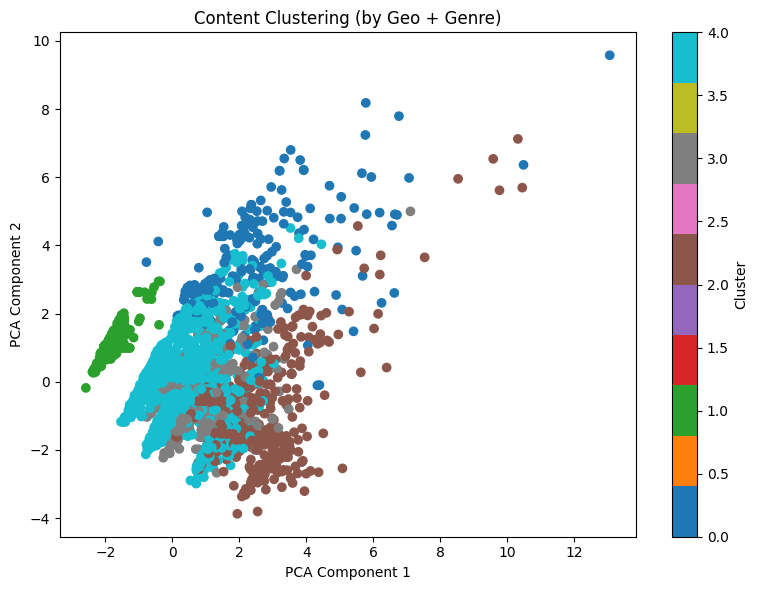

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='tab10')
plt.title("Content Clustering (by Geo + Genre)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


Cluster 0-This cluster contains highly rated, widely watched TV dramas from the UK, US, and Canada. Strong engagement (high numVotes) suggests these are flagship English-language series. Target audience: global English-speaking regions.

Cluster 1-Despite being the most recent content, these shows are not widely viewed yet. They may be new releases or niche regional content. Likely opportunity to promote or recommend through personalization strategies.

Cluster 2-Older but massively popular international action films. Despite lower ratings, they attract a lot of views, suggesting they’re re-watchable or mass-appeal blockbusters. Could be used in action-focused watchlists.

Cluster 3-A collection of independent international titles, moderately viewed. These could appeal to arthouse or festival audiences. Opportunity for curated recommendations in niche genres or languages.

Cluster 4-The largest and most diverse cluster, spanning various countries and genres. Likely includes supporting content that supplements Netflix’s catalog. This cluster can benefit from localized marketing and tagging for better discovery.

Strategic Takeaways
Cluster 0 and Cluster 2 are high-engagement clusters (lots of votes) — useful for surfacing in recommendation engines or “Top Watched” sections.

Cluster 1 has potential for growth but needs marketing push or better visibility.

Cluster 3 is ideal for a curated indie/film festival collection.

Cluster 4 is the content base — should be used for experimentation, A/B testing, or training recommender systems.